In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
import copy

In [ ]:
cust_seg = pd.read_csv('/content/drive/Othercomputers/My Laptop/data-science-assignments/09 - Clustering Algorithms/cust_seg.csv')
cust_seg.head()

In [ ]:
cust_seg.info()

In [5]:
# Creating the column selectors and one hot encoder
num_selector = make_column_selector(dtype_include='number')


# Part 1 - Determining which Clustering Algorithm to select

In [9]:
def calculateClusterAlgo(entire_df, xAxis, yAxis, clusterClass = KMeans,  i = 4, eps = 0.5, min_samples = 5):
    # Trying to ensure memory leakage and index chaining is prevented
    # Taking a copy of entire dataframe with deepcopy and using .loc as recommended in the documentation
    # https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
    fun_df = copy.deepcopy(entire_df)
    fun_df = fun_df.loc[:,(xAxis,yAxis)]
    # Instantiate Standard Scaler
    scaler = StandardScaler()
    # Fit & transform data
    scaled_df = scaler.fit_transform(fun_df)

    # Instantiate KMeans
    if clusterClass == DBSCAN:
        myCluster = clusterClass(eps = eps, min_samples = min_samples)
    else:
        myCluster = clusterClass(n_clusters = i)

    myCluster.fit(scaled_df)

    # Save the cluster labels to the dataframe
    fun_df['cluster'] = myCluster.labels_
    return fun_df

In [19]:
def calculateSilhouetteScores(entire_df, xAxis, yAxis, clusterClass = KMeans, stop = 11, eps = 0.5, min_samples = 5):
    
    silhouette_scores = list()
    
    if clusterClass == DBSCAN:
        i = 0
        for eps in np.arange(0.2,eps,0.1):

            scaled_df = calculateClusterAlgo(entire_df, xAxis, yAxis, clusterClass, i, eps, min_samples)
            silhouette_scores.append(silhouette_score(scaled_df, scaled_df['cluster']))
            i += 1
        stop = 2 + (i)
        
    else:
        for i in range(2,stop):
            
            scaled_df = calculateClusterAlgo(entire_df, xAxis, yAxis, clusterClass, i, eps, min_samples)
            silhouette_scores.append(silhouette_score(scaled_df, scaled_df['cluster']))
            plt.xlabel('Number of Clusters')

    ax_plt = sns.lineplot(x = range(2,stop), y = silhouette_scores, marker = 'X')
    #ax_plt = plt.plot(range(2,stop), silhouette_scores, marker = 'X')
    if clusterClass == DBSCAN:
        plt.xlabel('eps')
        x_ax_labels = ['{:.1f}'.format(x) for x in ax_plt.get_xticks()/10]
        ax_plt.set_xticklabels(x_ax_labels)

    plt.ylabel('Silhouette Score')
    plt.title(f'Plotting Silhouette Scores for\n Clustering Method {clusterClass} \nbased on features; {xAxis} and {yAxis}')
    plt.show()

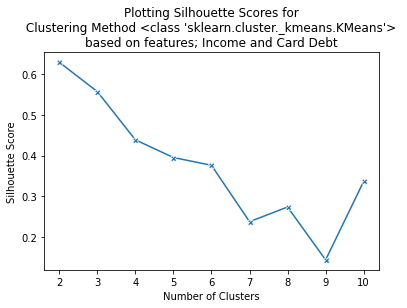

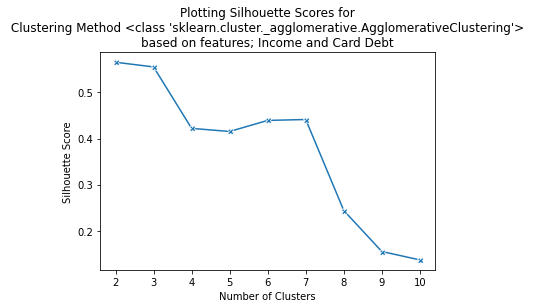

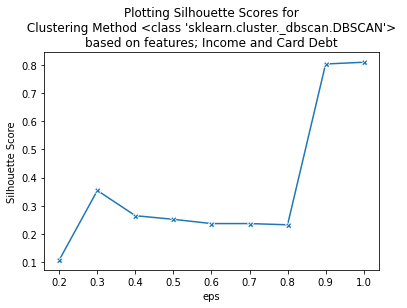

In [20]:
xAxis, yAxis = 'Income', 'Card Debt'
calculateSilhouetteScores(cust_seg, xAxis, yAxis, KMeans,11)

calculateSilhouetteScores(cust_seg, xAxis, yAxis, AgglomerativeClustering,11)

calculateSilhouetteScores(cust_seg, xAxis, yAxis, DBSCAN,11, 1.1, 5)

# Part 2 - Selected the Agglomerative Clustering Algorithm - It provides better differentiation amongst clump up data points.

In [29]:
def plotClusterAlgo(entire_df, xAxis, yAxis, clusterClass, i, eps, min_samples):

    fun_df = calculateClusterAlgo(entire_df, xAxis, yAxis, clusterClass, i, eps, min_samples)
    
    plt.scatter(fun_df[xAxis], fun_df[yAxis], c = fun_df['cluster'])
    plt.xlabel(xAxis)
    plt.ylabel(yAxis)
    plt.title(f'Cluster of Customers using\n {clusterClass}\n based on {xAxis}, {yAxis}')
    plt.show()


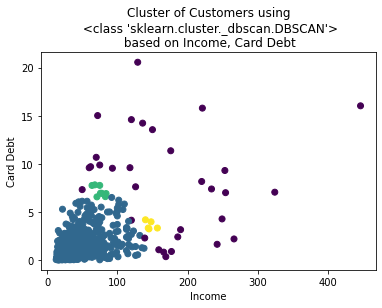

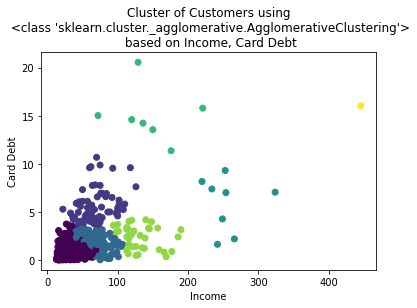

In [30]:
plotClusterAlgo(cust_seg, xAxis, yAxis, DBSCAN, 1, 0.4,5)

plotClusterAlgo(cust_seg, xAxis, yAxis, AgglomerativeClustering, 7, 0.4,5)

